# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
from scipy import stats

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
temp = []
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed =[]
        
print('Begining Data Retrieval')
print('-' * 30)

record = 1
record_set = 1

for c in cities:
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={c}&units=imperial&appid={weather_api_key}"
    response = requests.get(query_url).json()
    try:
        temp.append(response['main']['temp'])
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        print(f'Print Record {record} of Set {record_set} | {c}')
        
        if record % 50 == 0:
            record += 1
            record_set += 1
            time.sleep(70)
        else:
            record += 1
    except:
        print('City not found. Skipping.')
        pass

Begining Data Retrieval
------------------------------
Print Record 1 of Set 1 | dikson
Print Record 2 of Set 1 | olafsvik
Print Record 3 of Set 1 | ushuaia
City not found. Skipping.
Print Record 4 of Set 1 | bluff
Print Record 5 of Set 1 | vaini
Print Record 6 of Set 1 | ahvaz
Print Record 7 of Set 1 | atuona
Print Record 8 of Set 1 | valleyview
Print Record 9 of Set 1 | mar del plata
Print Record 10 of Set 1 | tazmalt
Print Record 11 of Set 1 | thompson
Print Record 12 of Set 1 | khatanga
Print Record 13 of Set 1 | hermanus
City not found. Skipping.
Print Record 14 of Set 1 | kapaa
Print Record 15 of Set 1 | rikitea
Print Record 16 of Set 1 | barrow
Print Record 17 of Set 1 | ahipara
Print Record 18 of Set 1 | bumba
Print Record 19 of Set 1 | saint-georges
Print Record 20 of Set 1 | bredasdorp
City not found. Skipping.
Print Record 21 of Set 1 | arona
Print Record 22 of Set 1 | te anau
Print Record 23 of Set 1 | quetigny
Print Record 24 of Set 1 | kapit
City not found. Skipping.
Prin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
weather_df = pd.DataFrame({
    'City': city,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lon': lon,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed
})

NameError: name 'pd' is not defined

In [4]:
weather_df.to_csv("cities.csv", encoding="utf-8", index=False)

NameError: name 'weather_df' is not defined

In [73]:
weather_df.count()

City          581
Cloudiness    581
Country       581
Date          581
Humidity      581
Lat           581
Lon           581
Max Temp      581
Wind Speed    581
dtype: int64

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [2]:
weather_df

NameError: name 'weather_df' is not defined

In [1]:
weather_df['Date'].to_datetime(unit = 's')

NameError: name 'weather_df' is not defined

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

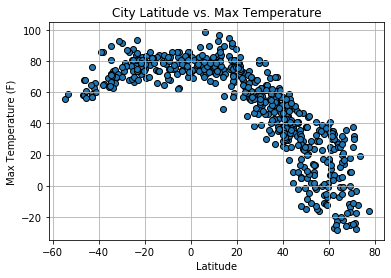

In [83]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid(True)
plt.show()

#### The closer a citys latitude is to 0 the higher the max temperature seems to be

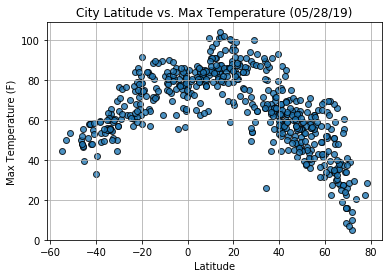

#### Latitude vs. Humidity Plot

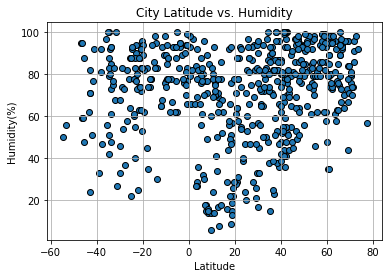

In [84]:
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)
plt.show()

### latitude seems to not be a factor in a city's humidity

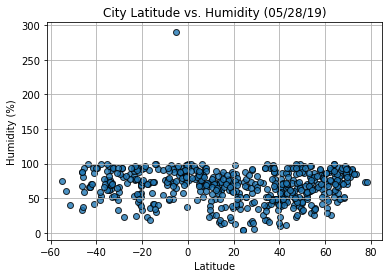

#### Latitude vs. Cloudiness Plot

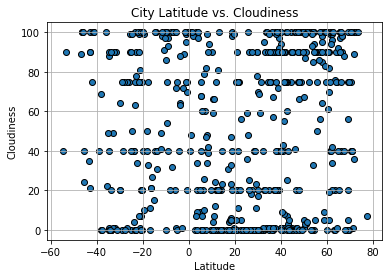

In [87]:
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.title('City Latitude vs. Cloudiness')
plt.show()

### latitude doesn't seem to affect a city's level of cloudiness

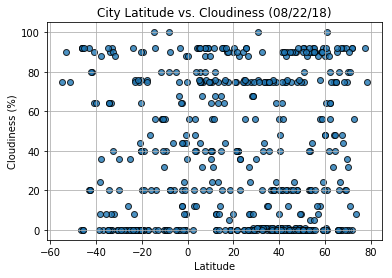

#### Latitude vs. Wind Speed Plot

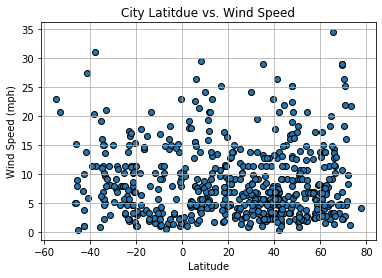

In [89]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitdue vs. Wind Speed')
plt.grid(True)
plt.show()

### Latitude doesn't seem to be the only factor in a city's wind speed

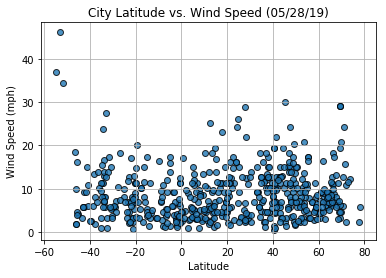

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [91]:
# Create Northern and Southern Hemisphere DataFrames
nh_df = weather_df[weather_df['Lat'] > 0]
sh_df = weather_df[weather_df['Lat'] < 0]


,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
1,Lahaina,20,US,1581537423,64,20.88,-156.68,75.2,4.70
2,Magdalena,20,PH,1581537448,78,14.20,121.43,75.2,4.70
3,Cabo San Lucas,5,MX,1581537449,55,22.89,-109.91,73.0,9.17
4,Pangnirtung,40,CA,1581537448,67,66.15,-65.71,-22.0,1.43
5,George Town,40,MY,1581537427,88,5.41,100.34,80.6,8.05


,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Busselton,0,AU,1581537448,48,-33.65,115.33,71.01,9.64
7,Ushuaia,40,AR,1581537450,50,-54.80,-68.30,55.40,23.04
9,Hermanus,0,ZA,1581537450,79,-34.42,19.23,72.00,7.00
11,Bluff,89,NZ,1581537450,95,-46.60,168.33,57.99,5.01
12,Hokitika,100,NZ,1581537451,82,-42.72,170.97,59.00,3.85


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8714851137858145


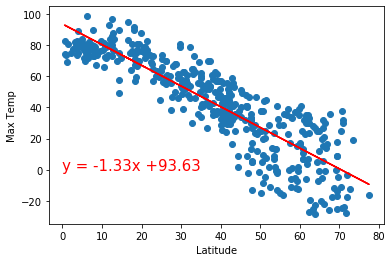

In [103]:
x_values = nh_df['Lat']
y_values = nh_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()


The r-squared is: -0.8151657406810827


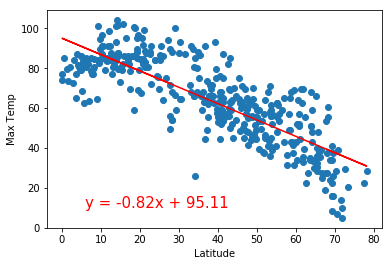

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5001838787248502


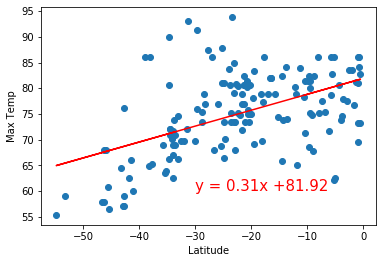

In [107]:
x_values = sh_df['Lat']
y_values = sh_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-30,60), fontsize=15, color="red")
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.760263355051646


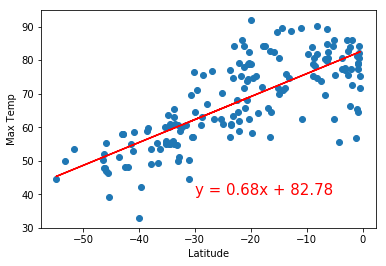

### there is lots of variation in max temp, more so in the northern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3860985463408292


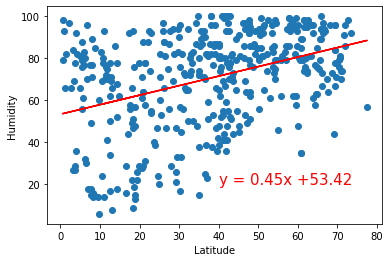

In [111]:
x_values = nh_df['Lat']
y_values = nh_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20), fontsize=15, color="red")
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.10358336015746494


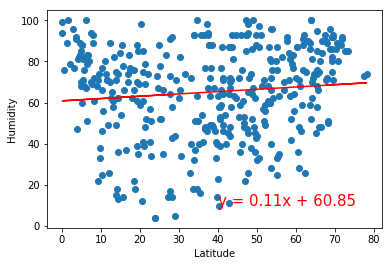

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.27335643427563167


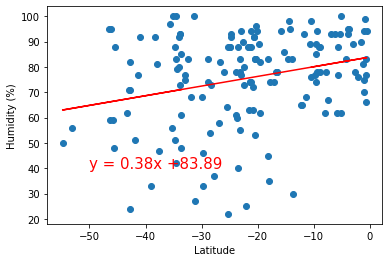

In [116]:
x_values = sh_df['Lat']
y_values = sh_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,40), fontsize=15, color="red")
print(f"The r-squared is: {rvalue}")

plt.show()

### humidity in the southern hemisphere is fairly consistent where as the northern hemisphere is not.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28628665044059276


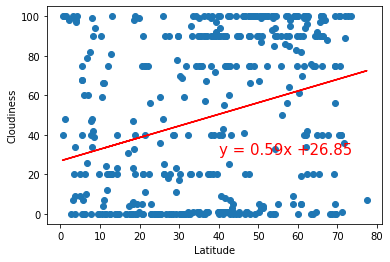

In [119]:
x_values = nh_df['Lat']
y_values = nh_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,30), fontsize=15, color="red")
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: -0.08733547918934018


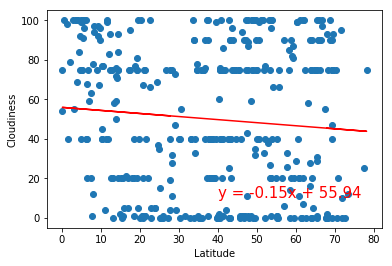

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14894761374921772


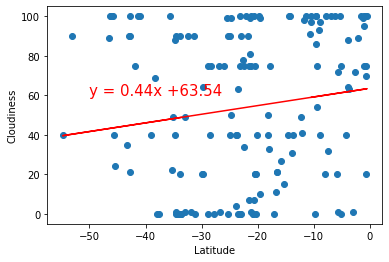

In [121]:
x_values = sh_df['Lat']
y_values = sh_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,60), fontsize=15, color="red")
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.21881426893991618


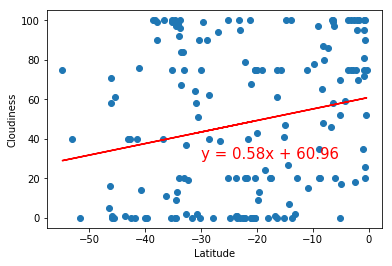

### Cloudiness is less random in the southern hemisphere is less 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024963558071234522


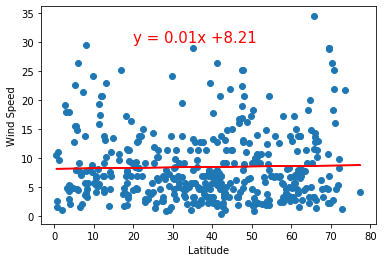

In [124]:
x_values = nh_df['Lat']
y_values = nh_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,30), fontsize=15, color="red")
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.1071382774388479


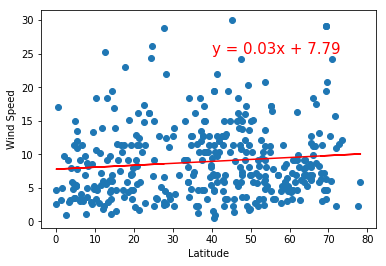

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024963558071234522


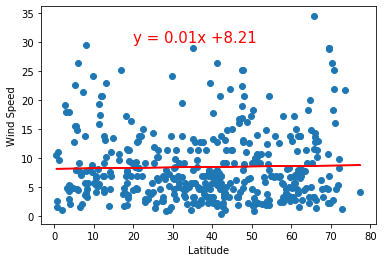

In [123]:
x_values = sh_df['Lat']
y_values = sh_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,30), fontsize=15, color="red")
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: -0.322483077139538


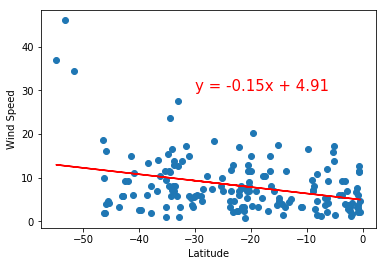

### wind data for the data for the northern hemisphere has less variation than the southern